<a href="https://colab.research.google.com/github/MeghanGH/time-series-with-python/blob/main/Manipulating_time_series_data_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# nyc_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/air_quality_data/nyc.csv'
# nyc = pd.read_csv(nyc_csv)
# nyc

Mounted at /content/drive


# How to use dates & times with pandas


In [3]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')
print(seven_days)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')
6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


# Indexing & resampling time series


In [4]:
nyc_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/air_quality_data/nyc.csv'
nyc = pd.read_csv(nyc_csv)
nyc.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035161,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


### Create a time series of air quality data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


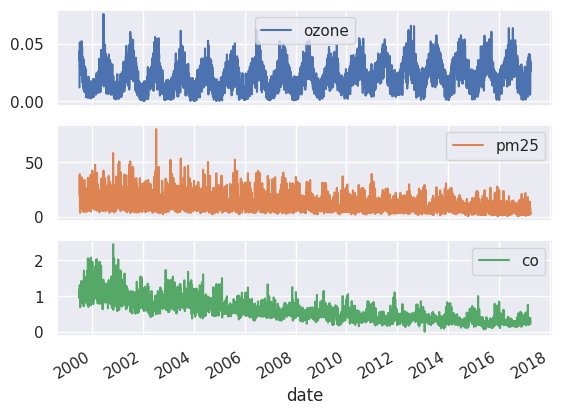

In [5]:
# Inspect data
print(nyc.info())

# Convert the date column to datetime64
nyc['date'] = pd.to_datetime(nyc['date'])

# Set date column as index
nyc.set_index('date', inplace=True)

# Inspect data
print(nyc.info())

# Plot data
nyc.plot(subplots=True)
plt.show()

### Compare annual stock price trends

In [6]:
yahoo_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/yahoo.csv'
yahoo = pd.read_csv(yahoo_csv)

# Convert the date column to datetime64
yahoo['date'] = pd.to_datetime(yahoo['date'])

# Set date column as index
yahoo.set_index('date', inplace=True)

yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


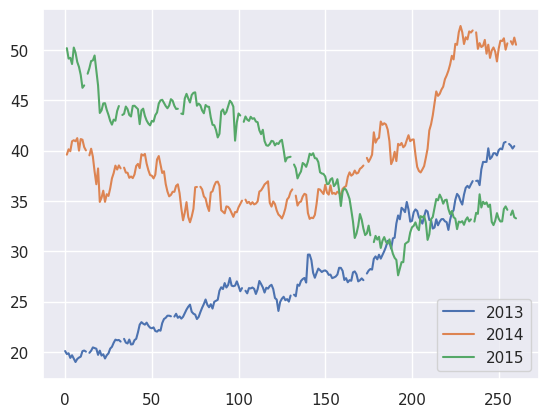

In [7]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

print(price_per_year)
print(prices)

In [8]:
yahoo.loc['2013', 'price']

      2015
0      NaN
1    50.17
2    49.13
3    49.21
4    48.59
..     ...
256    NaN
257  33.60
258  34.04
259  33.37
260  33.26

[261 rows x 1 columns]
      2013   2014   2015
0    20.08    NaN    NaN
1    19.78  39.59  50.17
2    19.86  40.12  49.13
3    19.40  39.93  49.21
4    19.66  40.92  48.59
..     ...    ...    ...
256  40.65    NaN    NaN
257  40.49  50.86  33.60
258  40.20  50.53  34.04
259  40.44  51.22  33.37
260    NaN  50.51  33.26

[261 rows x 3 columns]


date
2013-01-02    20.08
2013-01-03    19.78
2013-01-04    19.86
2013-01-07    19.40
2013-01-08    19.66
              ...  
2013-12-25      NaN
2013-12-26    40.65
2013-12-27    40.49
2013-12-30    40.20
2013-12-31    40.44
Name: price, Length: 260, dtype: float64

### Set and change time series frequency

In [9]:
co_cities_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/air_quality_data/co_cities.csv'
co = pd.read_csv(co_cities_csv)
co.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [10]:
co.isna().sum()

date           0
Chicago        0
Los Angeles    0
New York       0
dtype: int64

In [11]:
# Convert the date column to datetime64
co['date'] = pd.to_datetime(co['date'])

# Set date column as index
co.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None
             Chicago  Los Angeles  New York
date                                       
2005-01-01  0.317763     0.777657  0.639830
2005-01-02       NaN          NaN       NaN
2005-01-03  0.520833     0.349547  0.969572
2005-01-04  0.477083     0.626630  0.905208
2005-01-05  0.348822     0.613814  0.769176
...              ...          ...       ...
2010-12-27  0.510417     0.669384  0.414583
2010-12-28  0.479166     0.669129  0.425278
2010-12-29  0.460417     0.291757  0.400924
2010-12-30  0.364772     0.101042  0.744792
2010-12-31  0.381250     0.410824  0.784653

[2191 rows x 3 columns]


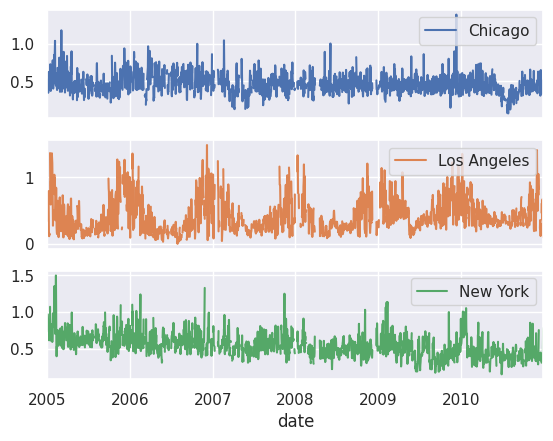

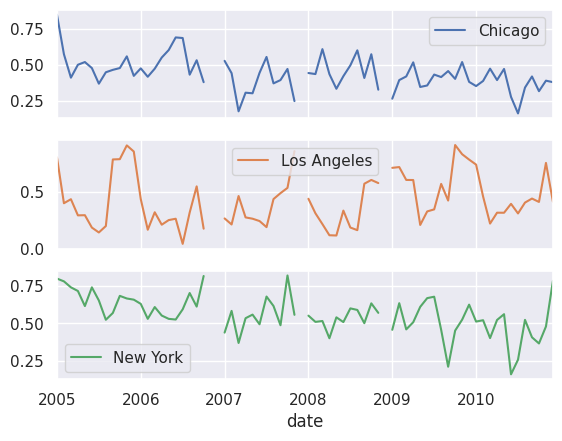

In [12]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')
print(co)

# Plot the data
co.plot(subplots=True)
plt.show()



# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()

### Lags, changes, and returns for stock price series

In [13]:
google_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/google.csv'
google = pd.read_csv(google_csv, parse_dates=['Date'], index_col='Date')
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


### Shifting stock prices across time

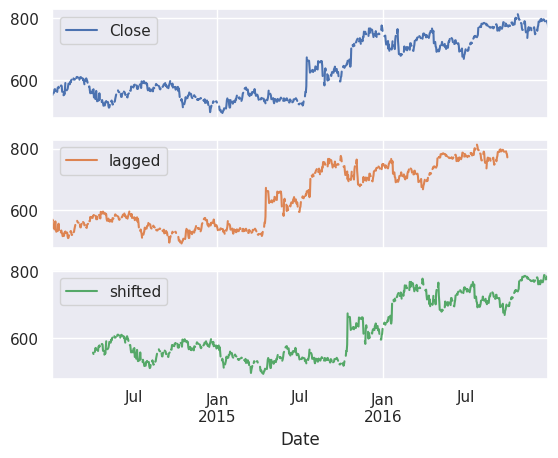

In [14]:
# Set data frequency to business daily
google = google.asfreq('D')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot(subplots=True)
plt.show()



### Calculating stock price changes

In [15]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.head(35))

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2013-01-02  20.08         NaN        NaN      NaN
2013-01-03  19.78         NaN        NaN      NaN
2013-01-04  19.86         NaN        NaN      NaN
2013-01-07  19.40         NaN        NaN      NaN
2013-01-08  19.66         NaN        NaN      NaN
2013-01-09  19.33         NaN        NaN      NaN
2013-01-10  18.99         NaN        NaN      NaN
2013-01-11  19.29         NaN        NaN      NaN
2013-01-14  19.43         NaN        NaN      NaN
2013-01-15  19.52         NaN        NaN      NaN
2013-01-16  20.07         NaN        NaN      NaN
2013-01-17  20.13         NaN        NaN      NaN
2013-01-18  20.02         NaN        NaN      NaN
2013-01-21    NaN         NaN        NaN      NaN
2013-01-22  19.90         NaN        NaN      NaN
2013-01-23  20.11         NaN        NaN      NaN
2013-01-24  20.44         NaN        NaN      NaN
2013-01-25  20.37         NaN        NaN      NaN


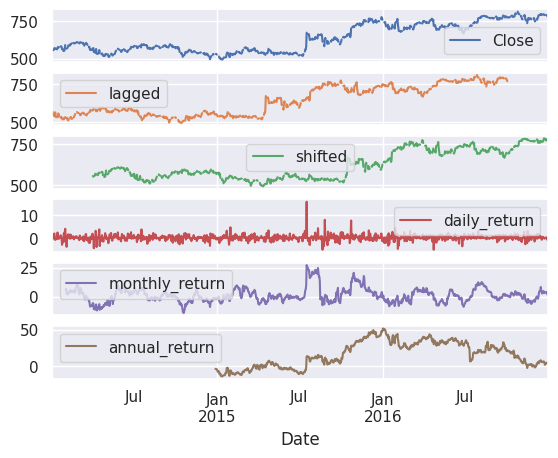

In [16]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()



# Basic Time Series Metrics & Resampling

### Compare time series growth rates

In [17]:
asset_classes_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/asset_classes.csv'
asset_classes = pd.read_csv(asset_classes_csv, parse_dates=['DATE'], index_col='DATE')
asset_classes.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None
                 SP500       Bonds        Gold         Oil
DATE                                                      
2007-06-29  100.000000  100.000000  100.000000  100.000000
2007-07-02  101.069611  100.201417  100.308404  100.908188
2007-07-03  101.431470   99.967674  101.349268  101.333901
2007-07-05  101.466724   99.502673  101.141095  101.901518
2007-07-06  101.801976   99.293796   99.884348  103.306372
...                ...         ...         ...         ...
2017-06-20  162.106629  154.628870  192.212799   61.501348
2017-06-21  162.012173  154.902400  192.297610   60.280971
2017-06-22  161.93

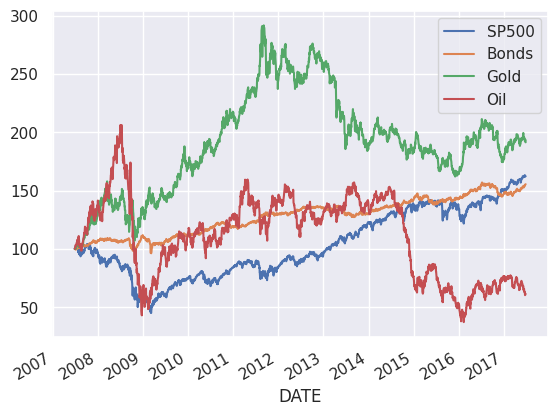

In [18]:
# Import data here
prices = pd.read_csv(asset_classes_csv, parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
# Divide prices by first_prices, multiply by 100 and assign the result to normalized.
normalized = prices.div(first_prices).mul(100)
print(normalized)

# Plot normalized
normalized.plot()
plt.show()


In [19]:
nyse_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/nyse.csv'
nyse = pd.read_csv(nyse_csv, parse_dates=['date'], index_col='date')
print(nyse.head())

dow_jones_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/dow_jones.csv'
dow_jones = pd.read_csv(dow_jones_csv, parse_dates=['date'], index_col='date')
print(dow_jones.head())

              JNJ    JPM    XOM
date                           
2010-01-04  64.68  42.85  69.15
2010-01-05  63.93  43.68  69.42
2010-01-06  64.45  43.92  70.02
2010-01-07  63.99  44.79  69.80
2010-01-08  64.21  44.68  69.52
                DJIA
date                
2010-01-04  10583.96
2010-01-05  10572.02
2010-01-06  10573.68
2010-01-07  10606.86
2010-01-08  10618.19


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


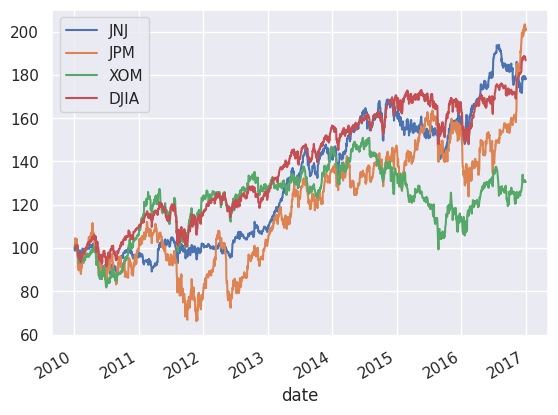

In [20]:
# Import stock prices and index here
stocks = pd.read_csv(nyse_csv, parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv(dow_jones_csv, parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks,dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
normalized = data.div(data.iloc[0]).mul(100).plot()
plt.show()


### Plot performance difference vs benchmark index

In [21]:
msft_aapl_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/msft_aapl.csv'
msft_aapl = pd.read_csv(msft_aapl_csv, parse_dates=['date'], index_col='date')
print(msft_aapl.head())

sp500_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/sp500.csv'
sp500 = pd.read_csv(sp500_csv, parse_dates=['date'], index_col='date')
print(sp500.head())

             AAPL   MSFT
date                    
2007-01-03  11.97  29.86
2007-01-04  12.24  29.81
2007-01-05  12.15  29.64
2007-01-08  12.21  29.93
2007-01-09  13.22  29.96
              SP500
date               
2007-06-29  1503.35
2007-07-02  1519.43
2007-07-03  1524.87
2007-07-05  1525.40
2007-07-06  1530.44


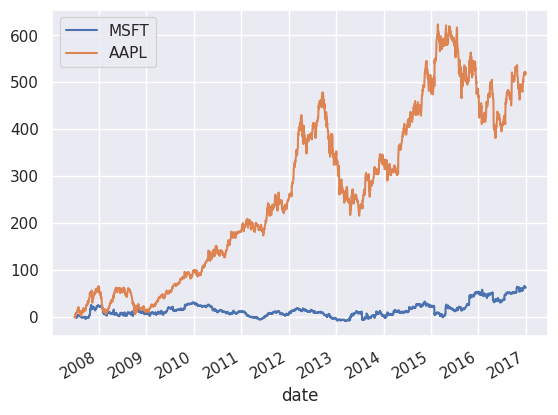

In [22]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv(msft_aapl_csv, parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv(sp500_csv, parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()


### Changing the time series frequency: resampling (bifill, ffill)

In [23]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


In [24]:
unrate_2000_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/unrate_2000.csv'
unrate = pd.read_csv(unrate_2000_csv, parse_dates=['date'], index_col='date')
print(unrate.index.name)
print(unrate.head())

date
            UNRATE
date              
2000-01-01     4.0
2000-02-01     4.1
2000-03-01     4.0
2000-04-01     3.8
2000-05-01     4.0


            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


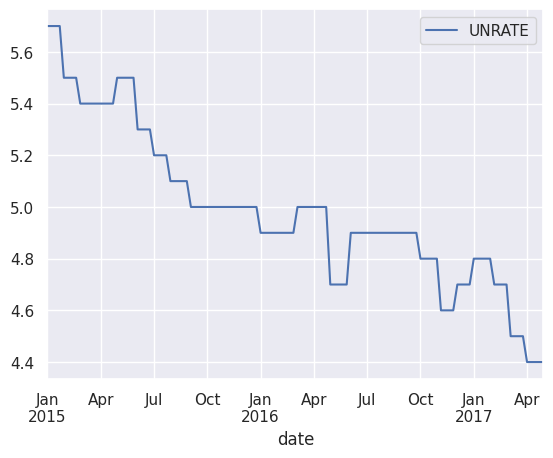

In [25]:
# Import data here
data = pd.read_csv(unrate_2000_csv, parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here
weekly_ffill.loc['2015':].plot()
plt.show()


### Upsampling & interpolation with .resample() .ffill() .interpolate()


In [26]:
unrate_2000_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/unrate_2000.csv'
unrate = pd.read_csv(unrate_2000_csv, parse_dates=['date'], index_col='date')
print(unrate.index.name)
print(unrate.head())
unrate.info()

date
            UNRATE
date              
2000-01-01     4.0
2000-02-01     4.1
2000-03-01     4.0
2000-04-01     3.8
2000-05-01     4.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [27]:
unrate.head()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB
None


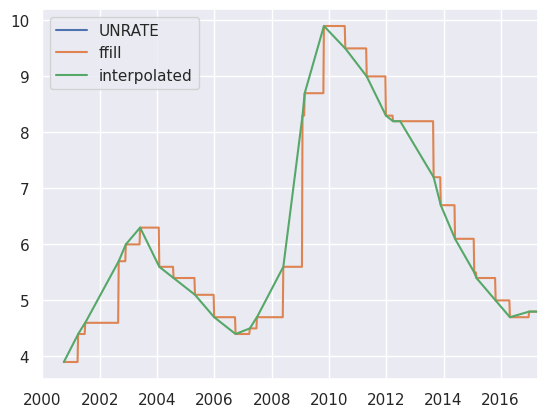

In [28]:
# Inspect data here
monthly = unrate
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

In [29]:
print(unrate.head(5)) # monthly ms (CalendarMonthStart)

print(unrate.resample('D').asfreq().head(5))

print('resample ffill')
print(unrate.resample('D').asfreq().ffill().head(5))

print('resample interpolate')
print(unrate.resample('D').asfreq().interpolate().head())


            UNRATE
date              
2000-01-01     4.0
2000-02-01     4.1
2000-03-01     4.0
2000-04-01     3.8
2000-05-01     4.0
            UNRATE
date              
2000-01-01     4.0
2000-01-02     NaN
2000-01-03     NaN
2000-01-04     NaN
2000-01-05     NaN
resample ffill
            UNRATE
date              
2000-01-01     4.0
2000-01-02     4.0
2000-01-03     4.0
2000-01-04     4.0
2000-01-05     4.0
resample interpolate
              UNRATE
date                
2000-01-01  4.000000
2000-01-02  4.003226
2000-01-03  4.006452
2000-01-04  4.009677
2000-01-05  4.012903


In [30]:
debt_unemployment_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/debt_unemployment.csv'
debt_unemployment = pd.read_csv(debt_unemployment_csv, parse_dates=['date'], index_col='date')
print(debt_unemployment.index.name)
print(debt_unemployment.head())
debt_unemployment.info()

date
            Debt/GDP  Unemployment
date                              
2010-01-01  87.00386           9.8
2010-02-01       NaN           9.8
2010-03-01       NaN           9.9
2010-04-01  88.67047           9.9
2010-05-01       NaN           9.6
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB


            Debt/GDP  Unemployment
date                              
2010-01-01  87.00386           9.8
2010-02-01       NaN           9.8
2010-03-01       NaN           9.9
2010-04-01  88.67047           9.9
2010-05-01       NaN           9.6
             Debt/GDP  Unemployment
date                               
2010-01-01  87.003860           9.8
2010-02-01  87.559397           9.8
2010-03-01  88.114933           9.9
2010-04-01  88.670470           9.9
2010-05-01  89.135103           9.6


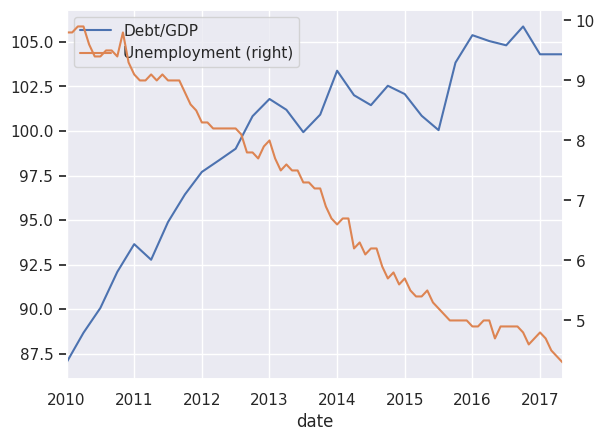

In [31]:
# Import & inspect data here
data = pd.read_csv(debt_unemployment_csv, parse_dates=['date'], index_col='date')
print(data.head())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.head())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment');
plt.show()

### Compare weekly, monthly and annual ozone trends for NYC & LA

In [32]:
ozone_nyla_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/air_quality_data/ozone_nyla.csv'
ozone = pd.read_csv(ozone_nyla_csv, parse_dates=['date'], index_col='date')
print(ozone.index.name)
print(ozone.head())
ozone.info()

date
            Los Angeles  New York
date                             
2000-01-01     0.008375  0.004032
2000-01-02          NaN  0.009486
2000-01-03          NaN  0.005580
2000-01-04     0.005500  0.008717
2000-01-05     0.005000  0.013754
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


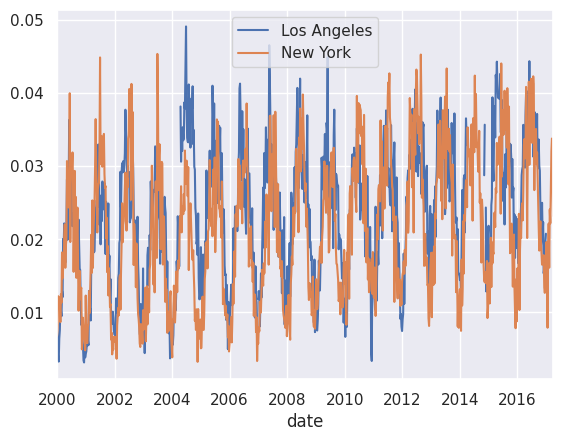

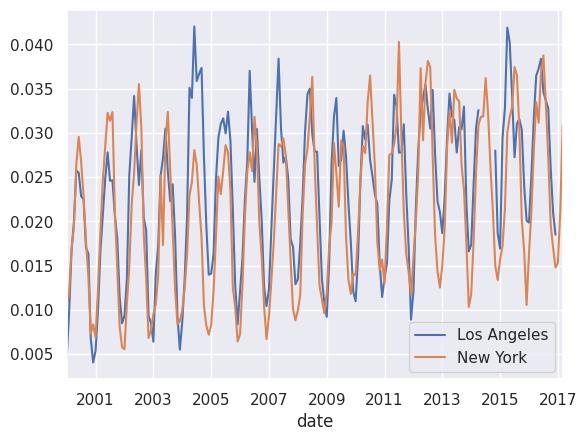

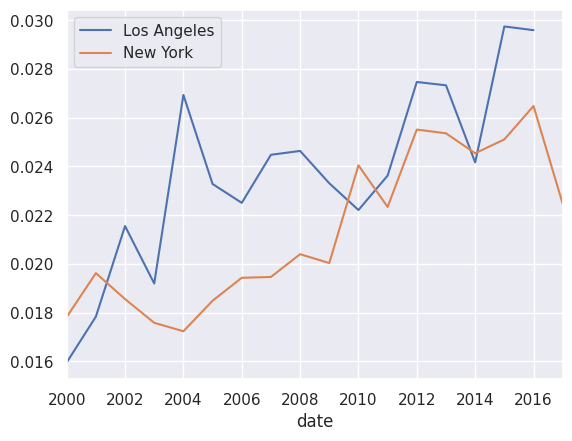

In [33]:
print(ozone.info())

#Apply .resample() with weekly frequency ('W') to ozone, aggregate using .mean() and plot the result.

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()


### Compare monthly average stock prices for Facebook and Google

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


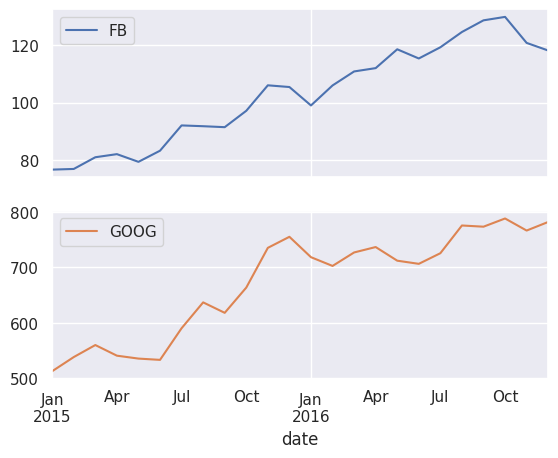

In [36]:
# Import and inspect data here
goog_fb_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/goog_fb.csv'
stocks = pd.read_csv(goog_fb_csv, parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show()




### Compare quarterly GDP growth rate and stock returns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


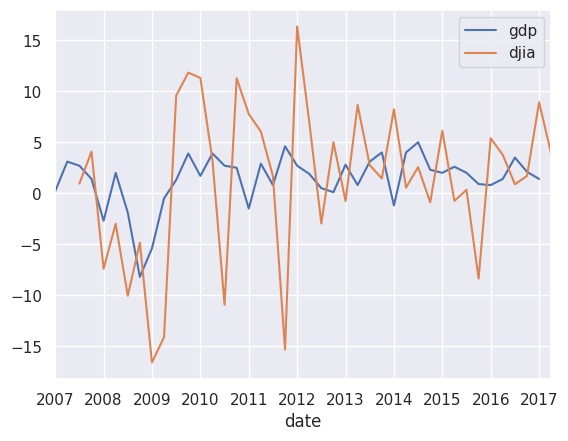

In [38]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())

# Import and inspect djia here
djia = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())

# Calculate djia quarterly returns here
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns=['gdp','djia']
data.plot()
plt.show()





### Visualize monthly mean, median and standard deviation of S&P500 returns

In [49]:
# Import and inspect data here
sp500 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/stock_data/sp500.csv', parse_dates=['date'], index_col='date')
print(sp500.info())
print(sp500.head())
print(sp500.squeeze().head()) # Convert sp500 to a pd.Series() using .squeeze()
print(sp500.squeeze().pct_change().head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB
None
              SP500
date               
2007-06-29  1503.35
2007-07-02  1519.43
2007-07-03  1524.87
2007-07-05  1525.40
2007-07-06  1530.44
date
2007-06-29    1503.35
2007-07-02    1519.43
2007-07-03    1524.87
2007-07-05    1525.40
2007-07-06    1530.44
Name: SP500, dtype: float64
date
2007-06-29         NaN
2007-07-02    0.010696
2007-07-03    0.003580
2007-07-05    0.000348
2007-07-06    0.003304
Name: SP500, dtype: float64


                mean    median       std
date                                    
2007-06-30       NaN       NaN       NaN
2007-07-31 -0.001490  0.000921  0.010908
2007-08-31  0.000668  0.001086  0.015261
2007-09-30  0.001900  0.000202  0.010000
2007-10-31  0.000676 -0.000265  0.008719


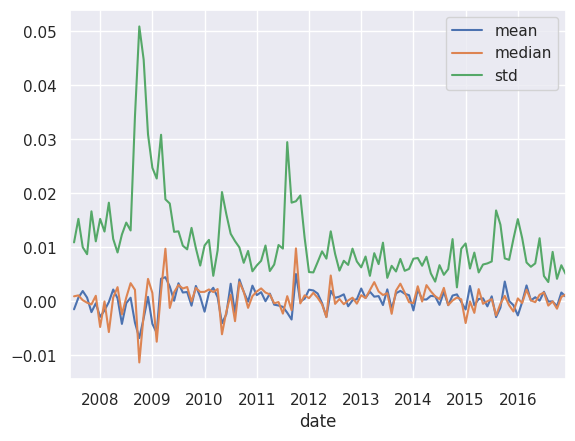

In [50]:
# Calculate daily returns here
# Convert sp500 to a pd.Series() using .squeeze(), and apply .pct_change() to calculate daily_returns.
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean','median','std'])
print(stats.head())

# Plot stats here
stats.plot()
plt.show()



# Window Functions: Rolling & Expanding Metrics

### Rolling average air quality since 2010 for new york city

Rolling is used for the data before current date backward by day.

In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

In [52]:
# Import and inspect data here
ozone = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(ozone.info())
print(ozone.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None
               Ozone
date                
2000-01-01  0.004032
2000-01-02  0.009486
2000-01-03  0.005580
2000-01-04  0.008717
2000-01-05  0.013754


In [70]:
ozone_test = ozone
ozone_test['1D'] = ozone_test.Ozone.rolling('1D').sum()
ozone_test['3D'] = ozone_test.Ozone.rolling('3D').sum()
print(ozone_test)
print(0.009486+0.005580+0.008717) # 0.023783
print(         0.005580+0.008717+0.013754) # 0.028051


               Ozone       90D      360D        1D        3D
date                                                        
2000-01-01  0.004032  0.004032  0.004032  0.004032  0.004032
2000-01-02  0.009486  0.006759  0.006759  0.009486  0.013518
2000-01-03  0.005580  0.006366  0.006366  0.005580  0.019098
2000-01-04  0.008717  0.006954  0.006954  0.008717  0.023783
2000-01-05  0.013754  0.008314  0.008314  0.013754  0.028051
...              ...       ...       ...       ...       ...
2017-03-27  0.005640  0.021992  0.026629  0.005640  0.060958
2017-03-28  0.013870  0.021999  0.026583  0.013870  0.050922
2017-03-29  0.034341  0.022235  0.026584  0.034341  0.053851
2017-03-30  0.026059  0.022334  0.026599  0.026059  0.074270
2017-03-31  0.035983  0.022467  0.026607  0.035983  0.096383

[6291 rows x 5 columns]
0.023783
0.028051


In [55]:
print(ozone.Ozone.rolling('90D'))
print(ozone['Ozone'].rolling('90D'))

Rolling [window=90D,min_periods=1,center=False,win_type=freq,axis=0,method=single]
Rolling [window=90D,min_periods=1,center=False,win_type=freq,axis=0,method=single]


<ipython-input-55-820588f34dec>:1: FutureWarning: win_type will no longer return 'freq' in a future version. Check the type of self.window instead.
  print(ozone.Ozone.rolling('90D'))
<ipython-input-55-820588f34dec>:2: FutureWarning: win_type will no longer return 'freq' in a future version. Check the type of self.window instead.
  print(ozone['Ozone'].rolling('90D'))


               Ozone       90D      360D
date                                    
2000-01-01  0.004032  0.004032  0.004032
2000-01-02  0.009486  0.006759  0.006759
2000-01-03  0.005580  0.006366  0.006366
2000-01-04  0.008717  0.006954  0.006954
2000-01-05  0.013754  0.008314  0.008314
...              ...       ...       ...
2017-03-27  0.005640  0.021992  0.026629
2017-03-28  0.013870  0.021999  0.026583
2017-03-29  0.034341  0.022235  0.026584
2017-03-30  0.026059  0.022334  0.026599
2017-03-31  0.035983  0.022467  0.026607

[6291 rows x 3 columns]


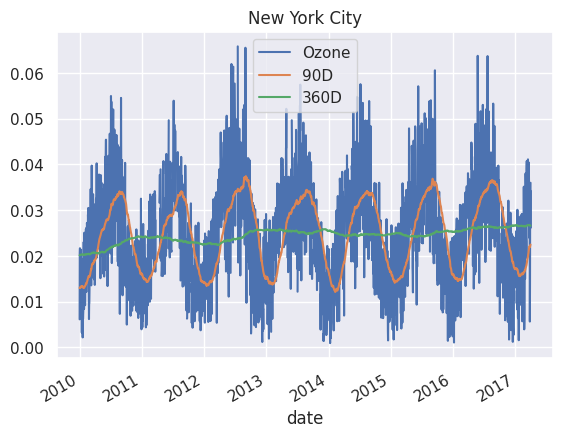

In [65]:
# Calculate 90d and 360d rolling mean for the last price
ozone['90D'] = ozone.Ozone.rolling('90D').mean()
ozone['360D'] = ozone.Ozone.rolling('360D').mean()
print(ozone)


# Plot data
ozone['2010':].plot(title='New York City')
plt.show()